# Importing python libraries

In [18]:
import numpy as np #for numerical computations
import pandas as pd #for reading the dataset
import matplotlib.pyplot as plt #for data visualization
import seaborn as sns #for interactive visualizations

Importing the dataset

In [19]:
dataset = pd.read_excel('Customers2.xlsx')

# exploring the dataset

In [ ]:
dataset.info

In [13]:
dataset.shape

(753, 12)

In [ ]:
#getting top 10 entries in dataset
dataset.head(10)

In [ ]:
#getting last 10 entries in dataset
dataset.tail(10)

In [ ]:
dataset.describe

In [20]:
#checking for missing/null values
null_columns=dataset.columns[dataset.isnull().any()]
#taking care of null values
dataset.fillna(0,inplace=True)


# Data Preprocessing & Visualization

plotting histogram of frequency of 'NumCalls' column with range (0-19) (20-39) and so on



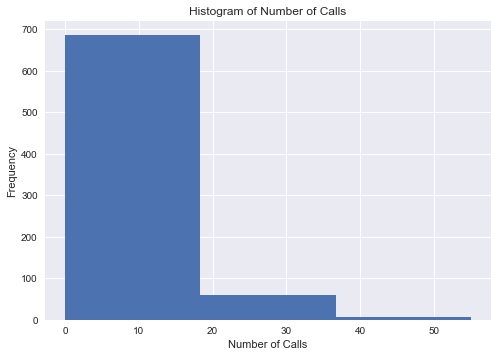

In [23]:
plt.style.use('seaborn')
plt.hist(dataset['NumCalls'] , bins=3)
plt.xlabel('Number of Calls')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Calls')
plt.show()

plotting a bar graph of 'Country' column

In [ ]:
dataset['Country'].value_counts().plot(kind='barh')
plt.xlabel('Countries')
plt.ylabel('Frequency')
plt.title('Visualizing countries and their occurrences in the dataset')
plt.show()

adding a new column 'TotalInteractions' to the dataset that contains sum of the columns NumCalls, NumEmails, NumDownloads, NumEvents, and NumForms

In [24]:
dataset['TotalInteractions'] = dataset['NumCalls'] + dataset['NumEmails'] + dataset['NumDownloads'] + dataset['NumEvents'] + dataset['NumForms']

In [25]:
dataset.shape

(753, 13)

In [26]:
#rearranging the columns
mid = dataset['TotalInteractions']
dataset.drop(labels=['TotalInteractions'], axis=1, inplace = True)
dataset.insert(6, 'TotalInteractions', mid)

In [27]:
dataset.head(5)

,CustomerID,NumCalls,NumEmails,NumDownloads,NumEvents,NumForms,TotalInteractions,Language,Country,WebVisits,PageVisits,PriorClient,MadeAPurchase
0,1,33,19,1,0,1,54,German,Germany,10.0,0.0,Yes,No
1,2,0,1,0,1,0,2,English,USA,61.0,0.0,No,No
2,3,4,6,2,0,0,12,Spanish,Mexico,1.0,0.0,No,No
3,4,0,10,0,0,1,11,English,India,26.0,0.0,No,No
4,5,7,0,0,0,0,7,English,USA,11.0,0.0,No,Yes


Modifying the 'Country' column

In [28]:
#first we create dummy variables
top = ['USA', 'China', 'Japan', 'France', 'Canada']
dataset['Country'] = dataset['Country'].apply(lambda x : 'Other' if x not in top else x)
df1 = pd.get_dummies(dataset['Country'])

In [29]:
dataset['Country'].value_counts()

Other     268
USA       180
Canada    151
Japan      72
France     43
China      39
Name: Country, dtype: int64

In [30]:
#merging dataset and df1
dataset =pd.concat([dataset,df1],axis=1)

In [31]:
#we dont need 'Country' column anymore, hence we drop it
dataset.drop(['Country'],axis=1,inplace=True)

In [ ]:
dataset.head(5)

similarly modifying the 'Language' column

In [32]:
top1 = ['English', 'German', 'Spanish', 'Japanese', 'Chinese']
dataset['Language'] = dataset['Language'].apply(lambda x : 'OtherLanguage' if x not in top1 else x)
df2 = pd.get_dummies(dataset['Language'])

In [33]:
dataset['Language'].value_counts()

English          384
OtherLanguage     99
German            96
Spanish           75
Japanese          72
Chinese           27
Name: Language, dtype: int64

In [34]:
#merging dataset and df2
dataset =pd.concat([dataset,df2],axis=1)

In [35]:
#we dont need 'Language' column anymore, hence we drop it
dataset.drop(['Language'],axis=1,inplace=True)

In [36]:
dataset.head(5)

,CustomerID,NumCalls,NumEmails,NumDownloads,NumEvents,NumForms,TotalInteractions,WebVisits,PageVisits,PriorClient,...,France,Japan,Other,USA,Chinese,English,German,Japanese,OtherLanguage,Spanish
0,1,33,19,1,0,1,54,10.0,0.0,Yes,...,0,0,1,0,0,0,1,0,0,0
1,2,0,1,0,1,0,2,61.0,0.0,No,...,0,0,0,1,0,1,0,0,0,0
2,3,4,6,2,0,0,12,1.0,0.0,No,...,0,0,1,0,0,0,0,0,0,1
3,4,0,10,0,0,1,11,26.0,0.0,No,...,0,0,1,0,0,1,0,0,0,0
4,5,7,0,0,0,0,7,11.0,0.0,No,...,0,0,0,1,0,1,0,0,0,0


Now, we perform label encoding on 'PriorClient' and 'MadeAPurchase' Column

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['PriorClient'] = le.fit_transform(dataset['PriorClient'])
dataset['MadeAPurchase'] = le.fit_transform(dataset['MadeAPurchase'])

In [38]:
dataset.shape

(753, 23)

# Preparing Training and Validation Sets 

The columns for our interest for preparing X(input features) are :
TotalInteractions
WebVisits
PageVisits
PriorClient
dummy variables of 'Country' and 'Language' columns

The column for y(output vector) is :
MadeAPurchase

In [39]:
X = dataset.iloc[:, [6,7,8,9,11,12,13,14,15,16,17,18,19,20,21,22]].values
y = dataset.iloc[:, 10].values

In [40]:
X.shape

(753, 16)

In [41]:
y.shape

(753,)

In [61]:
# Splitting the dataset into the Training set and validation set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [62]:
X_train.shape

(602, 16)

In [63]:
y_train.shape

(602,)

In [64]:
X_val.shape

(151, 16)

In [65]:
y_val.shape

(151,)

# Model Training 

we implement random forest classifier from the sklearn library for our dataset

In [66]:
#applying random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train,y_train)

C:\Users\KUSH\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [67]:
# Predicting the Validation set results
y_pred = rf.predict(X_val)

In [68]:
#plotting confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val ,y_pred)

In [69]:
cm

array([[37, 21],
       [19, 74]], dtype=int64)

In [73]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_val, y_pred)
average_precision

0.7456353980443524